In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import pickle
import seaborn as sns
from sklearn import decomposition
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
sns.set(color_codes=True)
%matplotlib inline
# Import necessary modules
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
data_frame = pd.read_csv("/content/drive/MyDrive/mansoor-work/dataset/merged_samples_drosophila.csv")

In [ ]:
data_frame.shape

(18426, 523)

In [ ]:
data_frame.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F514,F515,F516,F517,F518,F519,F520,F521,F522,positive
0,32,114,488,2328,78,294,1314,254,968,966,...,0,1,0,0,0,0,0,0,0,1
1,30,80,270,1046,89,237,809,309,807,1163,...,0,0,0,0,0,0,0,0,0,1
2,44,152,632,2918,114,388,1632,374,1202,1404,...,0,7,0,0,0,0,0,0,0,1
3,43,116,406,1628,131,345,1171,501,1299,2141,...,7,9,0,0,0,0,0,0,0,1
4,43,146,630,3050,115,357,1459,387,1083,1495,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
data_frame.tail(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F514,F515,F516,F517,F518,F519,F520,F521,F522,positive
18421,23,66,234,918,62,190,712,194,614,662,...,0,0,0,0,0,0,1,0,0,0
18422,32,91,317,1249,95,275,995,329,941,1235,...,0,0,0,0,0,5,3,6,0,0
18423,31,107,435,1907,83,278,1112,269,890,959,...,0,0,0,6,0,0,0,0,0,0
18424,35,103,347,1291,91,274,946,279,860,943,...,0,0,0,0,3,0,0,0,0,0
18425,39,126,490,2100,98,318,1236,298,964,1010,...,0,0,1,8,5,0,0,0,0,0


In [ ]:
print (data_frame.isnull().values.any())

False


In [ ]:
print(data_frame.columns)


Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       ...
       'F514', 'F515', 'F516', 'F517', 'F518', 'F519', 'F520', 'F521', 'F522',
       'positive'],
      dtype='object', length=523)


Check class distribution
Rare events are hard to predict

In [ ]:
num_obs = len(data_frame)

num_true = len(data_frame.loc[data_frame['positive'] == 1])
print(num_true)

num_false = len(data_frame.loc[data_frame['positive'] == 0])

print(num_false)

print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

9213
9213
Number of True cases:  9213 (50.00%)
Number of False cases: 9213 (50.00%)


**Spliting the data**
70% for training, 30% for testing



In [ ]:
#from sklearn.cross_validation import train_test_split

predicted_class_names = ['positive']

# Separating out the target
y = data_frame.loc[:,['positive']].values

df2 = data_frame.drop(['positive'], axis=1)
df2.reset_index(inplace=True)
# Separating out the features
x = df2.values

# Standardizing the features
X = StandardScaler().fit_transform(x)


## **XGBoost,ada boost,GradientBoostingClassifier**

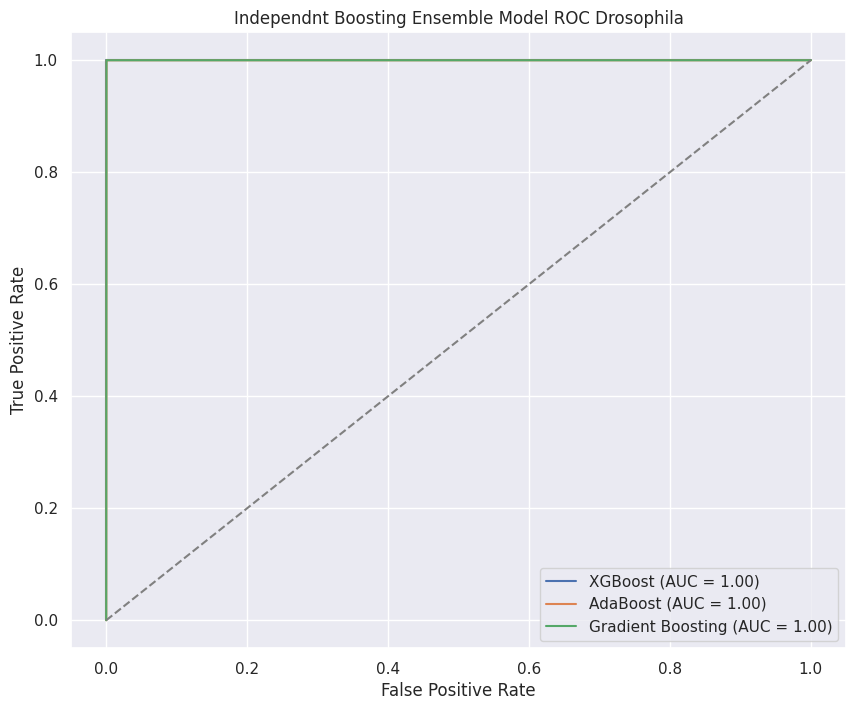

Results are saved in Boosting-ensemble-results_Drosophila_independnt.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import csv

# Assuming x is your feature matrix and y is your target variable

# Split the dataset into train and test sets with a 30-70 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check for infinity or very large values in X_train
if np.any(np.isinf(X_train)) or np.any(np.abs(X_train) > np.finfo(np.float32).max):
    # Preprocess your data to handle such values, for example, by scaling your features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

# Ensure y_train is properly formatted as a 1D array
y_train = np.ravel(y_train)


# Define base classifiers
base_classifiers = {
    "XGBoost": XGBClassifier(max_depth=50, learning_rate=0.2, n_estimators=150, random_state=0),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=None, learning_rate=0.2, algorithm='SAMME.R'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, max_depth=50, warm_start=True, random_state=0)
}

# Initialize lists to store metrics
metrics_list = []

# Initialize the figure for ROC curves
plt.figure(figsize=(10, 8))

for clf_name, clf in base_classifiers.items():
    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = clf.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate and true positive rate for ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # Calculate the Area Under the ROC Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

    # Calculate metrics
    tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    mcc = matthews_corrcoef(y_test, clf.predict(X_test))

    # Store metrics in a dictionary
    metrics = {
        "Classifier": clf_name,
        "True Positive": tp,
        "False Positive": fp,
        "True Negative": tn,
        "False Negative": fn,
        "Accuracy": accuracy,
        "Specificity": specificity,
        "Sensitivity": sensitivity,
        "MCC": mcc
    }

    # Append metrics to list
    metrics_list.append(metrics)

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='')

# Add labels and legend for ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Independnt Boosting Ensemble Model ROC Drosophila')
plt.legend()

# Show ROC curve
plt.grid(True)
plt.show()

# Save results to a CSV file
csv_file = 'Boosting-ensemble-results_Drosophila_independnt.csv'
with open(csv_file, 'w', newline='') as csvfile:
    fieldnames = ['Classifier', 'True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity', 'MCC']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for metrics in metrics_list:
        writer.writerow(metrics)

print(f"Results are saved in {csv_file}")
